In [27]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from scipy.stats import skew

In [28]:
stock = yf.Ticker("CESC.NS")
data = stock.history(period="3y", interval="1d")

data.index = data.index.date  # converts to plain date (datetime.date object)
# Select only numerical columns and round to 2 decimal places
data = data.round(2)
# ṛemoving not needed columns from the data
data = data[["Close", "Open" , "Low" , "High" , "Volume"]]

In [29]:
print("Stock Price of last 5 days :::")
data.tail()

Stock Price of last 5 days :::


,Close,Open,Low,High,Volume
2025-08-04,163.80,166.13,162.51,166.86,2479637
2025-08-05,164.27,164.20,162.50,167.07,2211894
2025-08-06,161.52,164.27,161.23,165.44,2795400
2025-08-07,165.84,161.40,160.50,170.27,18187448
2025-08-08,163.19,166.15,162.01,166.24,2642507


In [30]:
# check for missing values
print("Missing values in data >>>\n")
data.isna().sum()

Missing values in data >>>



Close     0
Open      0
Low       0
High      0
Volume    0
dtype: int64

In [31]:
# Summary statistics of numerical columns
print("summary statistics  \n",data.describe())

summary statistics  
             Close        Open         Low        High        Volume
count  742.000000  742.000000  742.000000  742.000000  7.420000e+02
mean   118.351011  118.487493  116.464380  120.512749  5.352938e+06
std     45.340443   45.419241   44.380197   46.372999  6.363200e+06
min     59.420000   59.660000   58.390000   61.260000  0.000000e+00
25%     69.850000   69.792500   69.012500   70.690000  2.021745e+06
50%    124.940000  125.305000  122.200000  127.540000  3.626648e+06
75%    163.052500  163.385000  160.845000  166.065000  6.162648e+06
max    202.320000  202.800000  196.700000  206.280000  7.028120e+07


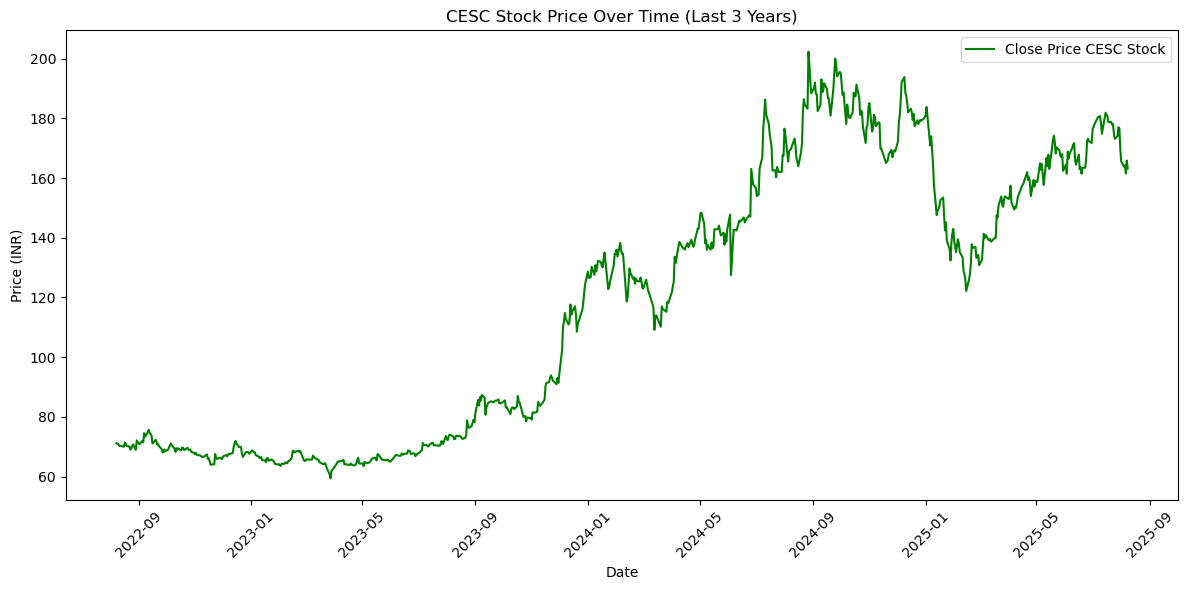

In [32]:
# stock price over the time using line chart
plt.figure(figsize=(12, 6))
sb.lineplot(data=data, x=data.index, y="Close", label="Close Price CESC Stock" , color="green")
plt.title("CESC Stock Price Over Time (Last 3 Years)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

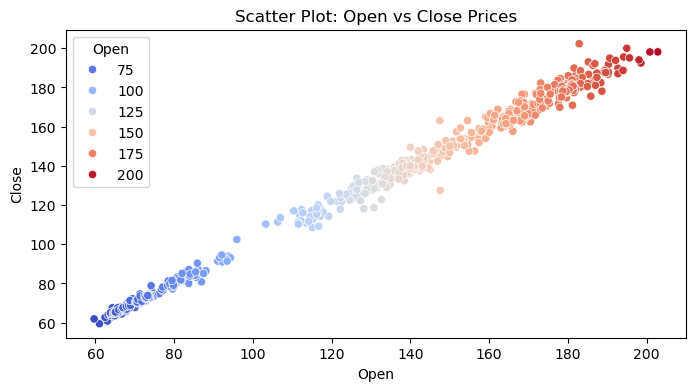

In [33]:
# Scatter plot between Open & Close prices
plt.figure(figsize=(8, 4))
sb.scatterplot(x=data['Open'], y=data['Close'], hue=data['Open'], palette='coolwarm')
plt.title("Scatter Plot: Open vs Close Prices")
plt.show()

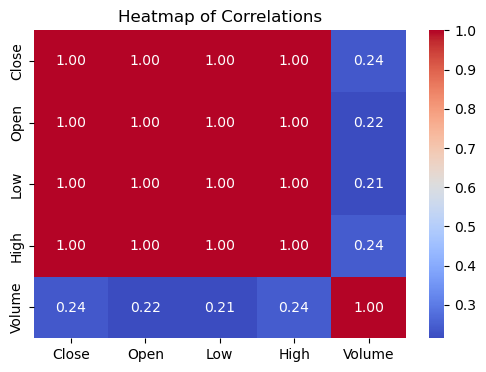

In [34]:
numeric_cols = data.select_dtypes(include=['float64', 'int64'])
# heatmap for visualizing relationships between numerical columns
plt.figure(figsize=(6, 4))
sb.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of Correlations")
plt.show()

##### Rule of thumb:-
- 0.5 < skew < 0.5 → fairly symmetrical
- Otherwise → consider transformation

In [36]:
print("Skewness (Close):", skew(data['Close']))
print("Skewness (Open):", skew(data['Open']))
print("Skewness (High):", skew(data['High']))
print("Skewness (Low):", skew(data['Low']))
print("Skewness (Volume):", skew(data['Volume']))

Skewness (Close): 0.12385275737756613
Skewness (Open): 0.12651616800850857
Skewness (High): 0.11839712331089683
Skewness (Low): 0.1369273299271371
Skewness (Volume): 4.6471660846202925


#### Skewness Analysis 
- Close = 0.124 -> 	Almost symmetrical — no serious skew.
- Open = 0.127 -> 	Almost symmetrical — no serious skew.
- High = 0.118 -> 	Almost symmetrical — no serious skew.
- Low = 0.137 -> 	Almost symmetrical — no serious skew.
- Volume = 4.647 -> Highly positively skewed — heavy right tail (some days have extremely high volume compared to others).